## Load Data

In [1]:
import json

def load_data(file_path):
    """
    Load the JSON file and extract the 'hits' data.
    """
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
        return data.get("hits", [])
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return []
    except json.JSONDecodeError:
        print(f"Error: Unable to decode JSON from file at {file_path}")
        return []

# File path
file_path = r"job_listings.json"

# Load data
job_data = load_data(file_path)

if job_data:
    print(f"Loaded {len(job_data)} job postings.")
else:
    print("No job data available.")


Loaded 10 job postings.


## Normalize Data

In [2]:
import pandas as pd

def normalize_data(hits):
    """
    Flatten and clean the data into a Pandas DataFrame.
    """
    if not hits:
        print("No data available to normalize.")
        return pd.DataFrame()
    
    df = pd.json_normalize(
        hits,
        record_path=["workplace_addresses"],
        meta=[
            "headline",
            "brief",
            "occupation_group.label",
            "occupation_field.label",
            "employer.name",
            "publication_date"
        ],
        sep="_",
        errors="ignore"
    )
    # Clean and preprocess data
    df["region"] = df["region"].fillna("Unknown")
    df["occupation_field.label"] = df["occupation_field.label"].fillna("Unknown")
    df["publication_date"] = pd.to_datetime(df["publication_date"])
    return df

# Normalize data
df = normalize_data(job_data)

if not df.empty:
    print("Data normalized successfully.")
    print(df.head())
else:
    print("No data to analyze.")


Data normalized successfully.
  municipality_concept_id municipality region_concept_id             region  \
0            P8yp_WT9_Bks         Flen      s93u_BEb_sx2  Södermanlands län   
1            P8yp_WT9_Bks         Flen      s93u_BEb_sx2  Södermanlands län   
2            P8yp_WT9_Bks         Flen      s93u_BEb_sx2  Södermanlands län   
3            P8yp_WT9_Bks         Flen      s93u_BEb_sx2  Södermanlands län   
4            P8yp_WT9_Bks         Flen      s93u_BEb_sx2  Södermanlands län   

  country_concept_id  country                              headline  \
0       i46j_HmG_v64  Sverige                     Arbetsledare Flen   
1       i46j_HmG_v64  Sverige                      Köksbiträde Flen   
2       i46j_HmG_v64  Sverige                 Takmontörer till Flen   
3       i46j_HmG_v64  Sverige  Sjuksköterska för vaccination - Flen   
4       i46j_HmG_v64  Sverige  Timvikarie till servicebostad i Flen   

                                               brief occupation_grou

## Analyze Data

In [3]:
def analyze_jobs_by_region(df):
    """Analyze the number of jobs by region."""
    return df["region"].value_counts()

def analyze_jobs_by_field(df):
    """Analyze the number of jobs by occupation field."""
    return df["occupation_field.label"].value_counts()

def analyze_top_employers(df, top_n=10):
    """Identify the top employers based on job postings."""
    return df["employer.name"].value_counts().head(top_n)

if not df.empty:
    jobs_by_region = analyze_jobs_by_region(df)
    print("\nJobs by Region:")
    print(jobs_by_region)

    jobs_by_field = analyze_jobs_by_field(df)
    print("\nJobs by Occupation Field:")
    print(jobs_by_field)

    top_employers = analyze_top_employers(df)
    print("\nTop Employers:")
    print(top_employers)
else:
    print("No data to analyze.")



Jobs by Region:
region
Södermanlands län    10
Name: count, dtype: int64

Jobs by Occupation Field:
occupation_field.label
Unknown    10
Name: count, dtype: int64

Top Employers:
Series([], Name: count, dtype: int64)


## Visualize Data

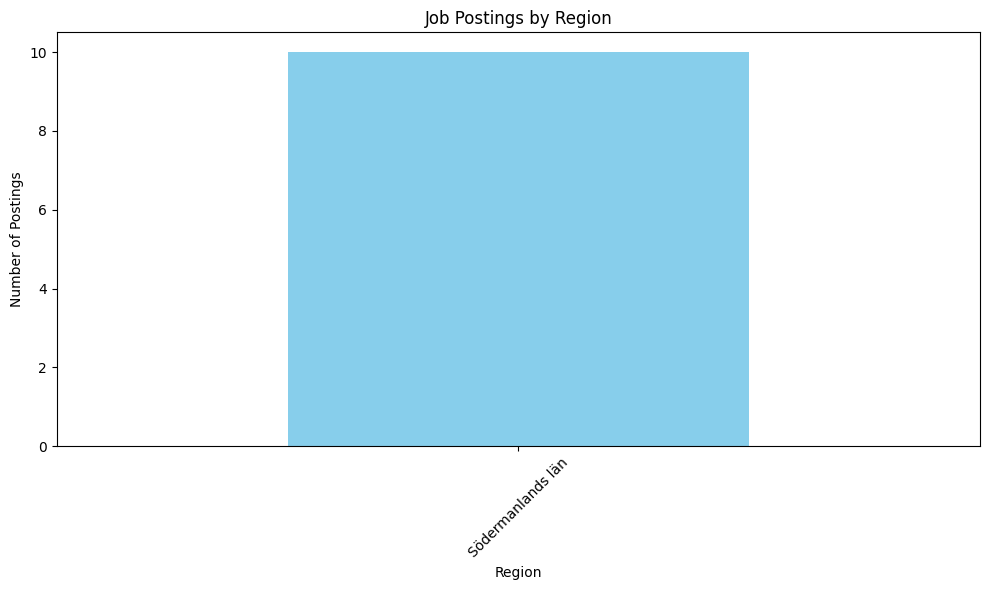

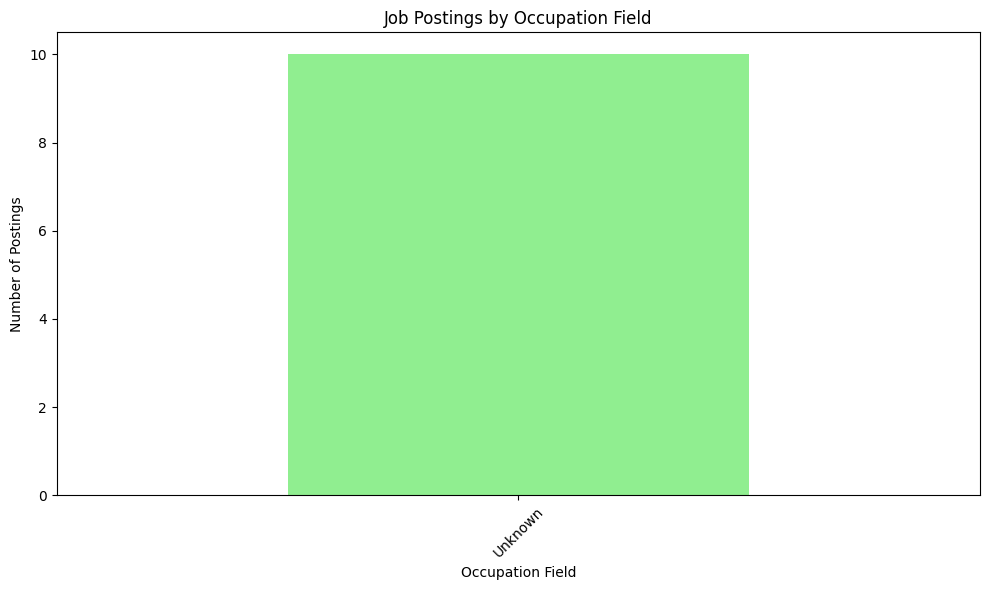

In [4]:
import matplotlib.pyplot as plt

def visualize_data(data, title, xlabel, ylabel, color="skyblue"):
    """Create a bar plot for the given analysis data."""
    if data.empty:
        print(f"No data available to visualize for: {title}")
        return

    plt.figure(figsize=(10, 6))
    data.plot(kind="bar", color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Visualize data
if not df.empty:
    visualize_data(jobs_by_region, "Job Postings by Region", "Region", "Number of Postings")
    visualize_data(jobs_by_field, "Job Postings by Occupation Field", "Occupation Field", "Number of Postings", color="lightgreen")
else:
    print("No data to visualize.")


## 1. Advanced Data Analysis

### a) Trend Analysis:



Publication Trends:
publication_date
2024-10-21    2
2024-10-29    1
2024-11-05    1
2024-11-08    1
2024-11-12    2
2024-11-19    1
2024-11-20    2
Name: count, dtype: int64


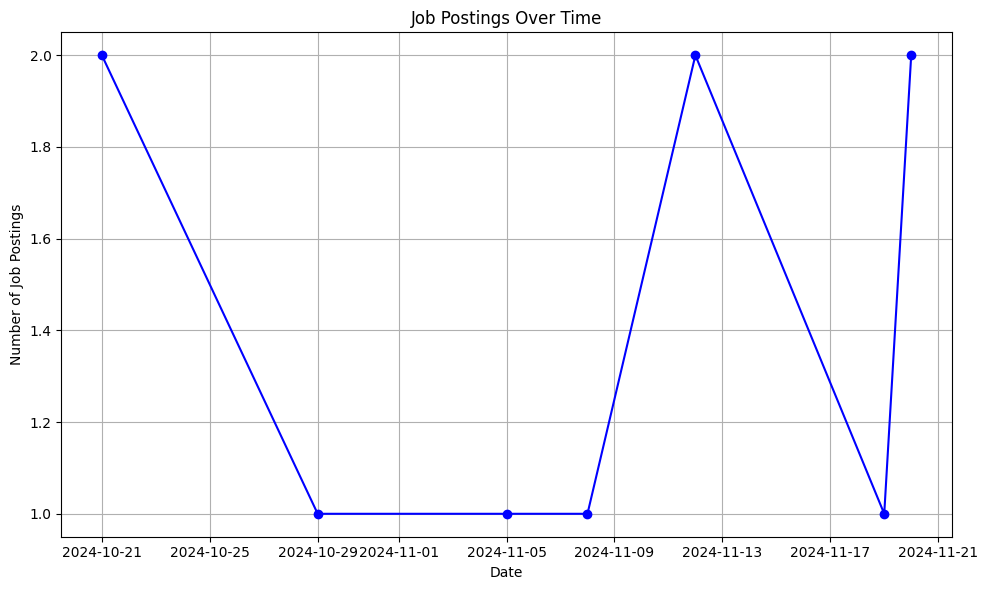

In [5]:
def analyze_publication_trends(df):
    """Analyze job posting trends by date."""
    trends = df["publication_date"].dt.date.value_counts().sort_index()
    return trends

if not df.empty:
    publication_trends = analyze_publication_trends(df)
    print("\nPublication Trends:")
    print(publication_trends)

    # Visualize the trends
    publication_trends.plot(kind="line", figsize=(10, 6), color="blue", marker="o")
    plt.title("Job Postings Over Time")
    plt.xlabel("Date")
    plt.ylabel("Number of Job Postings")
    plt.grid()
    plt.tight_layout()
    plt.show()


### b) Geographical Insights:

Data loaded successfully!
  municipality_concept_id municipality region_concept_id             region  \
0            P8yp_WT9_Bks         Flen      s93u_BEb_sx2  Södermanlands län   
1            P8yp_WT9_Bks         Flen      s93u_BEb_sx2  Södermanlands län   
2            P8yp_WT9_Bks         Flen      s93u_BEb_sx2  Södermanlands län   
3            P8yp_WT9_Bks         Flen      s93u_BEb_sx2  Södermanlands län   
4            P8yp_WT9_Bks         Flen      s93u_BEb_sx2  Södermanlands län   

  country_concept_id  country                              headline  \
0       i46j_HmG_v64  Sverige                     Arbetsledare Flen   
1       i46j_HmG_v64  Sverige                      Köksbiträde Flen   
2       i46j_HmG_v64  Sverige                 Takmontörer till Flen   
3       i46j_HmG_v64  Sverige  Sjuksköterska för vaccination - Flen   
4       i46j_HmG_v64  Sverige  Timvikarie till servicebostad i Flen   

  employer.name     publication_date  
0           NaN  2024-10-29T00:00

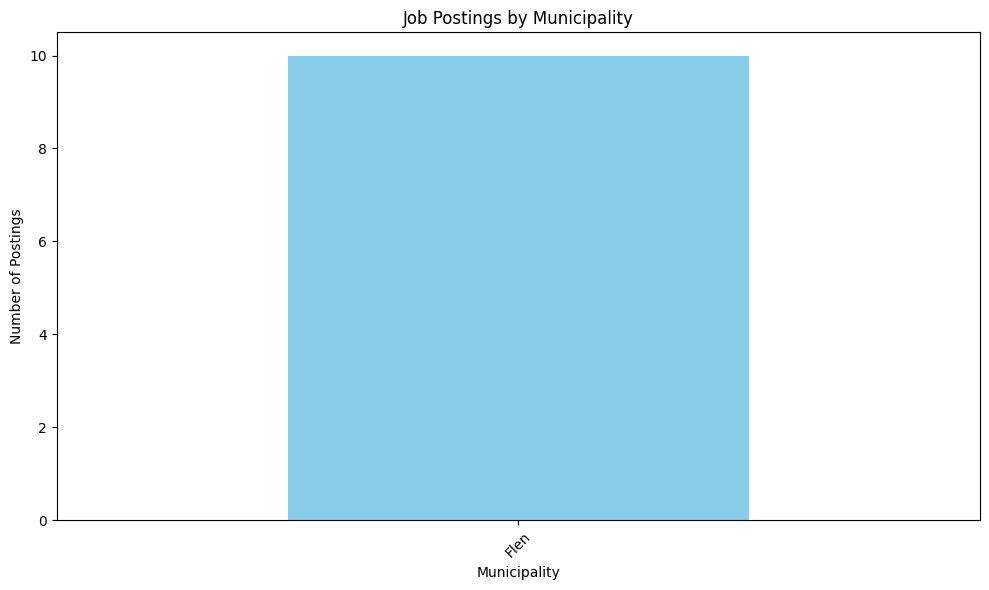

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# Load JSON data into a DataFrame
def load_data(file_path):
    """
    Load JSON data and return a Pandas DataFrame.
    """
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
        # Normalize data into a flat DataFrame
        df = pd.json_normalize(
            data.get("hits", []),
            record_path=["workplace_addresses"],  # Adjust based on JSON structure
            meta=["headline", "employer.name", "publication_date"],
            sep="_",
            errors="ignore"
        )
        return df
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return pd.DataFrame()
    except Exception as e:
        print(f"An error occurred: {e}")
        return pd.DataFrame()

# Analyze data by municipality
def analyze_jobs_by_municipality(df):
    """
    Analyze the number of jobs by municipality.
    """
    if "municipality" in df.columns:
        return df["municipality"].value_counts()
    else:
        print("The column 'municipality' does not exist in the data.")
        return pd.Series()

# Visualize data using Matplotlib
def visualize_data(data, title, xlabel, ylabel):
    """
    Create a bar chart from the given data.
    """
    if not data.empty:
        data.plot(kind='bar', figsize=(10, 6), color='skyblue')
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print("No data to visualize.")

# Main execution block
if __name__ == "__main__":
    # Path to the JSON file
    file_path = r"C:\Users\alans\Desktop\Project_JobHunt\job_listings.json"
    
    # Load data into DataFrame
    df = load_data(file_path)
    
    if not df.empty:
        print("Data loaded successfully!")
        print(df.head())  # Preview the first few rows of the DataFrame

        # Analyze and visualize jobs by municipality
        jobs_by_municipality = analyze_jobs_by_municipality(df)
        visualize_data(jobs_by_municipality, "Job Postings by Municipality", "Municipality", "Number of Postings")
    else:
        print("The DataFrame is empty. Please check your data source.")


## Cleaned job listings 

In [7]:
# Main function
def main(file_path):
    """
    Main workflow for loading, normalizing, analyzing, and visualizing job data.
    """
    job_data = load_data(file_path)
    if not job_data:
        print("No job data loaded. Exiting...")
        return

    print("Raw job data:", job_data[:3])  # Print first 3 entries to inspect structure
    
    # Normalize the data
    df = normalize_data(job_data)
    if df.empty:
        print("No data available after normalization. Exiting...")
        return

    print("Normalized DataFrame:")
    print(df.head())  # Display the first few rows of the DataFrame for inspection
    
    # Analyze data
    jobs_by_region = analyze_jobs_by_region(df)
    print("Jobs by Region:")
    print(jobs_by_region)  # Print the analysis result for debugging
    
    jobs_by_field = analyze_jobs_by_field(df)
    print("Jobs by Occupation Field:")
    print(jobs_by_field)  # Print the analysis result for debugging

    # Save the cleaned data
    save_cleaned_data(df, "cleaned_job_listings.csv")

    # Visualize the results
    visualize_data(jobs_by_region, "Job Postings by Region", "Region", "Number of Postings")
    visualize_data(jobs_by_field, "Job Postings by Occupation Field", "Occupation Field", "Number of Postings")


In [8]:
def load_data(file_path):
    """
    Load JSON data from a file.
    """
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
        print("Example data structure:", json.dumps(data.get("hits", [])[0], indent=4))  # Inspect one entry
        return data.get("hits", [])
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return []
    except Exception as e:
        print(f"An error occurred while loading data: {e}")
        return []


In [9]:
def main(file_path):
    """
    Main workflow for loading, normalizing, analyzing, and visualizing job data.
    """
    job_data = load_data(file_path)
    if not job_data:
        print("No job data loaded. Exiting...")
        return

    print("Raw job data:", job_data[:3])  # Inspect raw data structure

    # Normalize the data
    df = normalize_data(job_data)
    if df.empty:
        print("No data available after normalization. Exiting...")
        return

    print("Normalized DataFrame:")
    print(df.head())  # Inspect the normalized DataFrame

    # Analyze data
    jobs_by_region = analyze_jobs_by_region(df)
    print("Jobs by Region:")
    print(jobs_by_region)  # Debug print

    jobs_by_field = analyze_jobs_by_field(df)
    print("Jobs by Occupation Field:")
    print(jobs_by_field)  # Debug print

    # Save the cleaned data
    save_cleaned_data(df, "cleaned_job_listings.csv")

    # Visualize the results
    visualize_data(jobs_by_region, "Job Postings by Region", "Region", "Number of Postings")
    visualize_data(jobs_by_field, "Job Postings by Occupation Field", "Occupation Field", "Number of Postings")
